<a href="https://colab.research.google.com/github/ELHAIRECH/Titanic---Machine-Learning-from-Disaster/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

In [ ]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:


train_df1 = train_df[["Pclass","Age","Fare", "Sex", "SibSp", "Parch","Embarked"]]
test_df1 = test_df[["Pclass","Age","Fare", "Sex", "SibSp", "Parch","Embarked"]]
target_data = train_df["Survived"]
train_df1


,Pclass,Age,Fare,Sex,SibSp,Parch,Embarked
0,3,22.0,7.2500,male,1,0,S
1,1,38.0,71.2833,female,1,0,C
2,3,26.0,7.9250,female,0,0,S
3,1,35.0,53.1000,female,1,0,S
4,3,35.0,8.0500,male,0,0,S
...,...,...,...,...,...,...,...
886,2,27.0,13.0000,male,0,0,S
887,1,19.0,30.0000,female,0,0,S
888,3,NaN,23.4500,female,1,2,S
889,1,26.0,30.0000,male,0,0,C


## **Numerical** **Features** 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


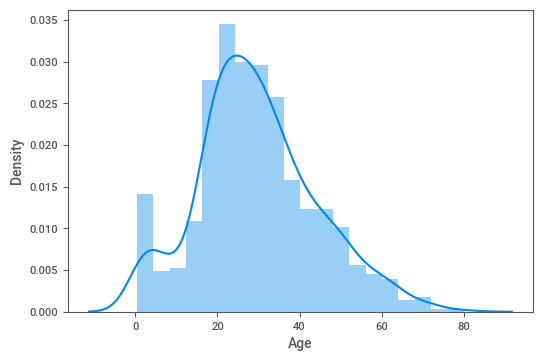

In [ ]:

sns.distplot(train_df1['Age'])

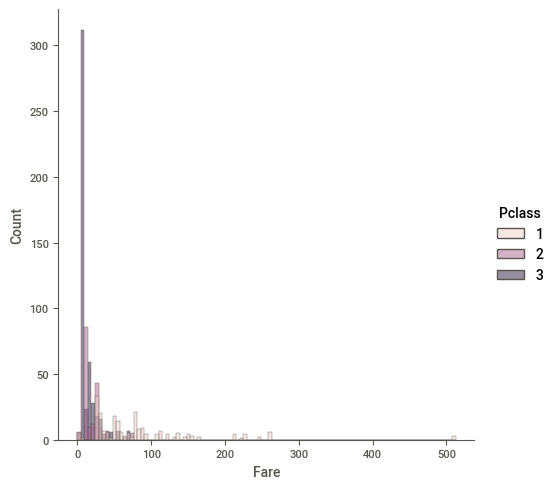

In [ ]:
sns.displot(data=train_df1,x='Fare',hue='Pclass')

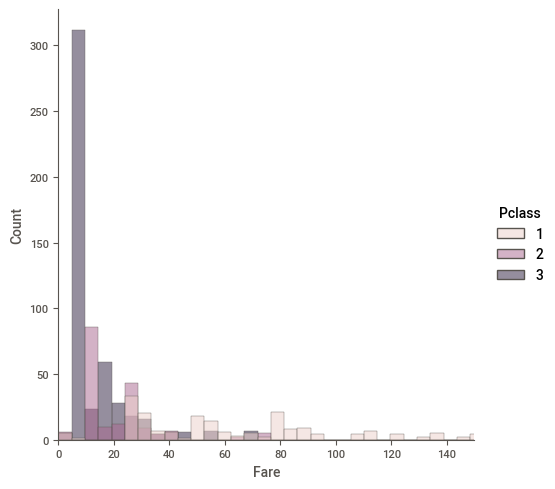

In [ ]:
sns.displot(data=train_df1,x='Fare',hue='Pclass').set(xlim=(0,150))

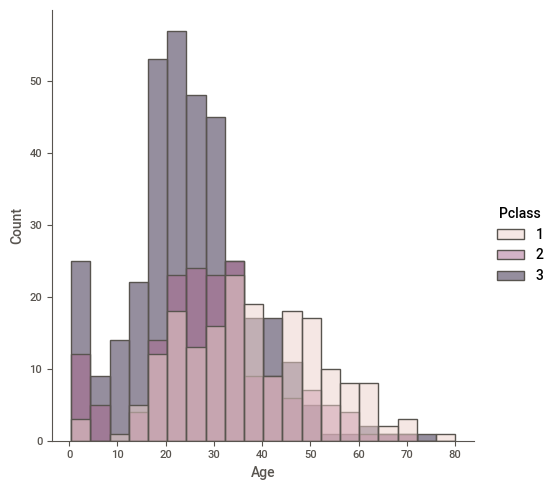

In [ ]:
sns.displot(data=train_df1,x='Age',hue='Pclass')

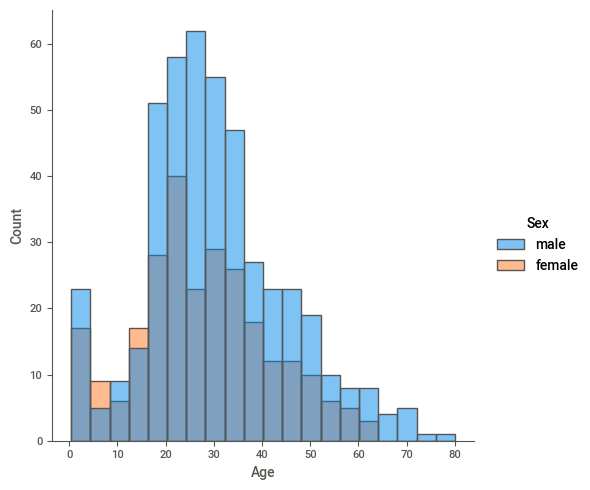

In [ ]:
sns.displot(data=train_df1,x='Age',hue='Sex')

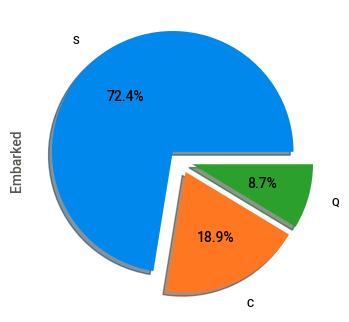

In [ ]:
v=train_df1['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%', labeldistance=1.2,explode=(0.1, 0.1, 0.1),shadow=True)

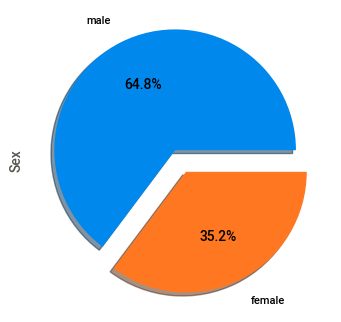

In [ ]:
v=train_df1['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%', labeldistance=1.2,explode=(0.1, 0.1),shadow=True)

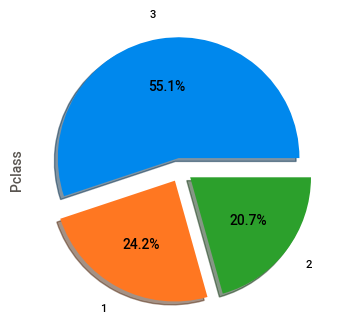

In [ ]:
v=train_df1['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%', labeldistance=1.2,explode=(0.1, 0.1, 0.1),shadow=True)

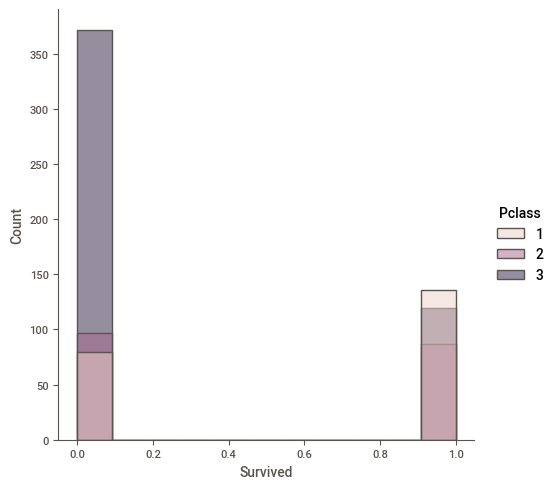

In [ ]:
sns.displot(data=train_df,x='Survived',hue='Pclass',kind='hist')


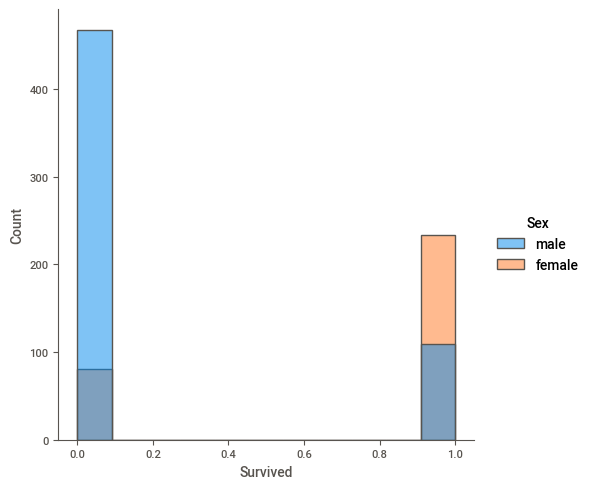

In [ ]:
sns.displot(data=train_df,x='Survived',hue='Sex',kind='hist')

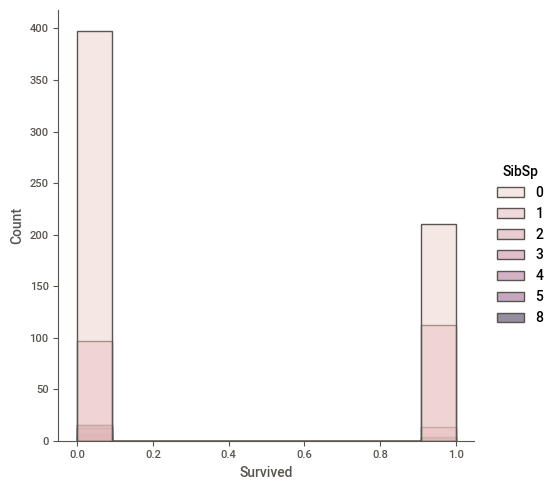

In [ ]:
sns.displot(data=train_df,x='Survived',hue='SibSp',kind='hist')

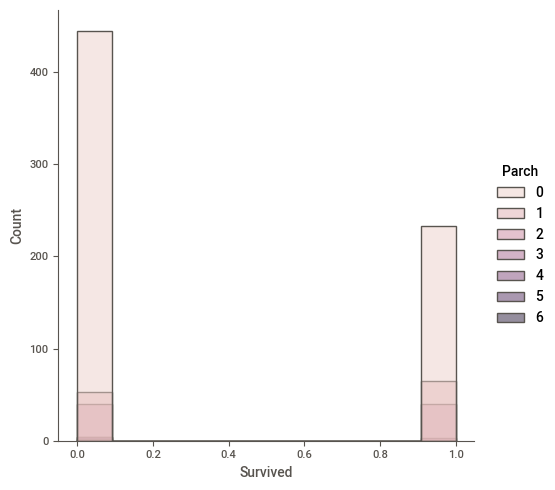

In [ ]:
sns.displot(data=train_df,x='Survived',hue='Parch',kind='hist')

We have looked at data distribution and now we can draw some conclusions from our data analaysis.
1. The passengers with parents/children and siblings/spouse had higher chances of survival (You better travel with your family next time)
2. There was higher chance of death among male passengers comapred to female passengers
3. The survival rate of class 3 is lower compared to other 2 classes
4. Fare distribtuion is uneven showing the ticket prices may be split according to classes
5. There are a lot of passengers in class 3 compared to class 1


In [ ]:
train_df1.describe()

,Pclass,Age,Fare,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.523008,0.381594
std,0.836071,14.526497,49.693429,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,0.000000
75%,3.000000,38.000000,31.000000,1.000000,0.000000
max,3.000000,80.000000,512.329200,8.000000,6.000000


In [ ]:
train_df1.isnull().sum()

Pclass        0
Age         177
Fare          0
Sex           0
SibSp         0
Parch         0
Embarked      2
dtype: int64

we are going to fill age null values with mean

In [ ]:
train_df1['Age'].fillna(train_df1['Age'].median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
test_df1['Age'].fillna(test_df1['Age'].median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
print(train_df1['Age'].isnull().sum(),test_df1['Age'].isnull().sum(),"null values remaining in train, test")

0 0 null values remaining in train, test


In [ ]:
def func(x):
    if x[0]>0 or x[1]>0:
        return True
    else:
        return False
train_df1['WithFamily']=train_df1[['SibSp','Parch']].apply(func,axis=1)
test_df1['WithFamily']=test_df1[['SibSp','Parch']].apply(func,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train_df1.drop(columns=['SibSp','Parch'],inplace=True)
test_df1.drop(columns=['SibSp','Parch'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_df1['Embarked'].fillna('S',inplace=True)
test_df1['Embarked'].fillna('S',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:

def encodeAgeFare(train):
    train.loc[train['Age'] <= 16, 'Age'] = 0
    train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
    train.loc[ (train['Age'] > 48) & (train['Age'] <= 80), 'Age'] = 4
    
    train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
    train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'Fare'] = 2
    train.loc[(train['Fare'] > 31.0) & (train['Fare'] <= 512.329), 'Fare'] = 3

encodeAgeFare(train_df1)
encodeAgeFare(test_df1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
#To change categorical to numerical, we will be using above One-hot encoding 
train_df1=pd.get_dummies(train_df1,columns=['Sex','Embarked','WithFamily'],drop_first=True)
test_df1=pd.get_dummies(test_df1,columns=['Sex','Embarked','WithFamily'],drop_first=True)

In [ ]:
train_df1

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,WithFamily_True
0,3,1.0,0.0,1,0,1,1
1,1,2.0,3.0,0,0,0,1
2,3,1.0,1.0,0,0,1,0
3,1,2.0,3.0,0,0,1,1
4,3,2.0,1.0,1,0,1,0
...,...,...,...,...,...,...,...
886,2,1.0,1.0,1,0,1,0
887,1,1.0,2.0,0,0,1,0
888,3,1.0,2.0,0,0,1,1
889,1,1.0,2.0,1,0,0,0


# ***Training***

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
model = xgb.XGBClassifier(**{'colsample_bylevel': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000,
                                 'reg_lambda': 15,'eval_metric': 'error','subsample': 0.5}).fit(train_df1, target_data)

In [ ]:

test_y = model.predict(test_df1).astype(int)

In [ ]:
final_preds = [y  for y in test_y]

final_preds = (np.array(final_preds)> 0.5) * 1

In [ ]:
print('XGBoost score on train data:', round(model.score(train_df1, target_data) * 100, 2))

XGBoost score on train data: 84.29


In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': final_preds})
output.to_csv('my_submission.csv', index=False)